In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter, binary_closing, binary_opening, binary_erosion, binary_dilation
from skimage import io, transform
import matplotlib.pyplot as plt

(917, 1630, 3) (1960, 2504, 3)
0 255
0 255


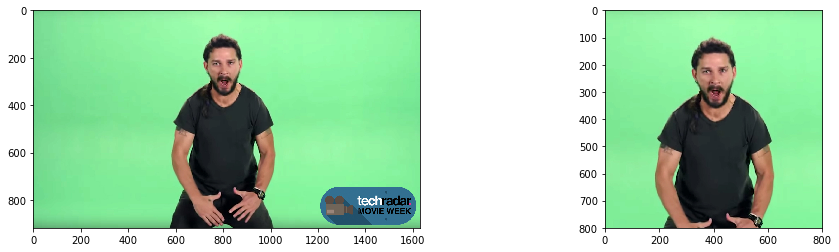

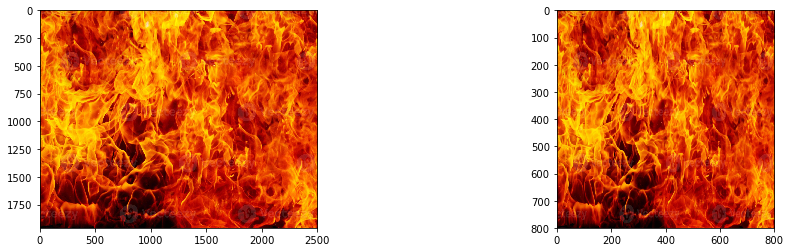

(800, 800, 3) (800, 800, 3)


In [2]:
just_do_it = io.imread('just_do_it.jpg')
fire = io.imread('fire.jpg')
print(just_do_it.shape, fire.shape)
print(np.min(just_do_it), np.max(just_do_it))
print(np.min(fire), np.max(fire))

fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].imshow(just_do_it)
just_do_it_crop = just_do_it[0:800, 400:1200]
axs[1].imshow(just_do_it_crop)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].imshow(fire)
fire_resize = (transform.resize(fire, (800,800)) * 255).astype(np.uint8)
axs[1].imshow(fire_resize)
plt.show()

print(just_do_it_crop.shape, fire_resize.shape)

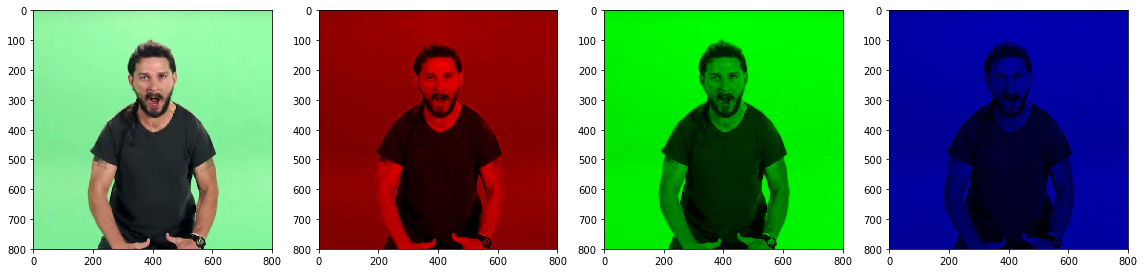

In [3]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
im = axs[0].imshow(just_do_it_crop)

tmp_arr = just_do_it_crop.copy()
tmp_arr[:,:,1:3] = 0
im = axs[1].imshow(tmp_arr)

tmp_arr = just_do_it_crop.copy()
tmp_arr[:,:,0:3:2] = 0
im = axs[2].imshow(tmp_arr)

tmp_arr = just_do_it_crop.copy()
tmp_arr[:,:,0:2] = 0
im = axs[3].imshow(tmp_arr)

fig.tight_layout()
plt.show()

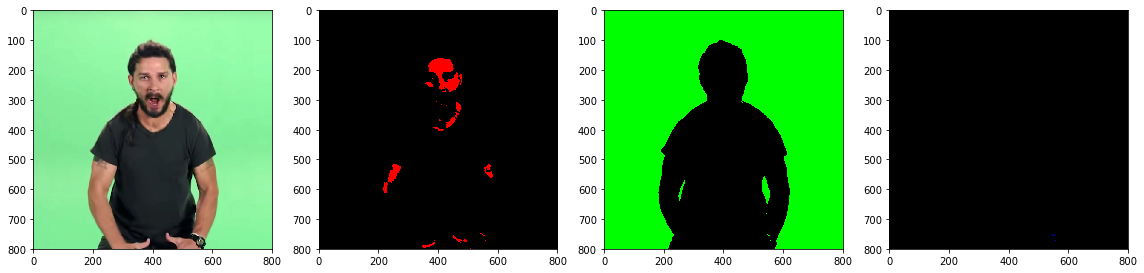

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
im = axs[0].imshow(just_do_it_crop)

tmp_arr = just_do_it_crop.copy()
tmp_arr[:,:,1:3] = 0
tmp_arr[tmp_arr < 200] = 0
tmp_arr[tmp_arr >= 200] = 255
im = axs[1].imshow(tmp_arr)

tmp_arr = just_do_it_crop.copy()
tmp_arr[:,:,0:3:2] = 0
tmp_arr[tmp_arr < 200] = 0
tmp_arr[tmp_arr >= 200] = 255
im = axs[2].imshow(tmp_arr)

tmp_arr = just_do_it_crop.copy()
tmp_arr[:,:,0:2] = 0
tmp_arr[tmp_arr < 200] = 0
tmp_arr[tmp_arr >= 200] = 255
im = axs[3].imshow(tmp_arr)

fig.tight_layout()
plt.show()

(800, 800)


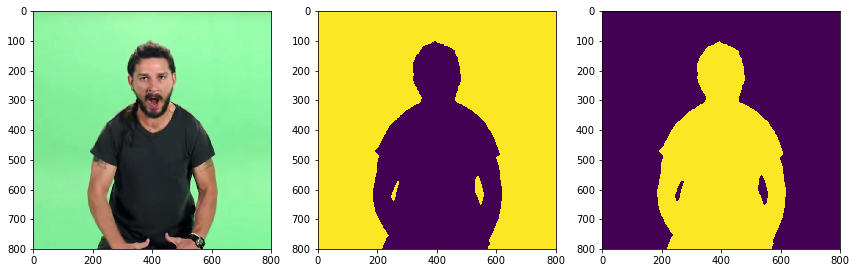

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
im = axs[0].imshow(just_do_it_crop)

tmp_arr = just_do_it_crop.copy()
tmp_arr[:,:,0:3:2] = 0
tmp_arr[tmp_arr < 200] = 0
tmp_arr[tmp_arr >= 200] = 255
mask = np.sum(tmp_arr, axis=-1)
mask = binary_dilation(binary_opening(mask, iterations=2), iterations=2)
im = axs[1].imshow(mask)

inverted_mask = binary_erosion(np.invert(mask), iterations=1)
print(inverted_mask.shape)
im = axs[2].imshow(inverted_mask)

fig.tight_layout()
plt.show()

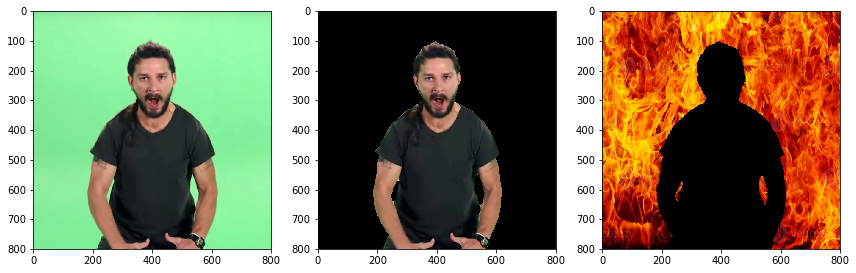

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
im = axs[0].imshow(just_do_it_crop)

just_do_it_masked = np.expand_dims(inverted_mask, axis=-1)*just_do_it_crop
im = axs[1].imshow(just_do_it_masked)

fire_masked = np.expand_dims(mask, axis=-1)*fire_resize
im = axs[2].imshow(fire_masked)

fig.tight_layout()
plt.show()

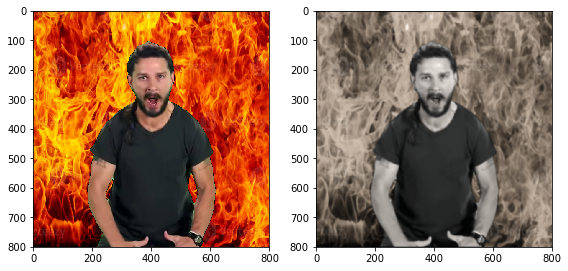

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

blending = fire_masked + just_do_it_masked
blending = blending / blending.max()
blending = (blending * 255).astype(np.uint8)
im = axs[0].imshow(blending)

blending = gaussian_filter(fire_masked, sigma=2) + gaussian_filter(just_do_it_masked, sigma=2)
blending = blending / blending.max()
blending = (blending * 255).astype(np.uint8)
im = axs[1].imshow(blending)

fig.tight_layout()
plt.show()

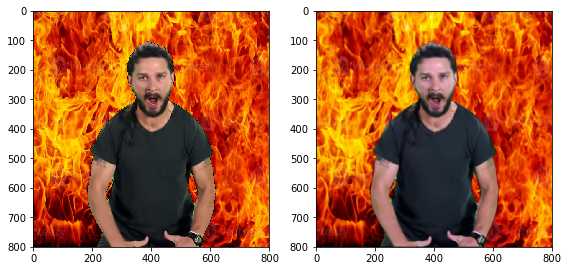

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

blending = fire_masked + just_do_it_masked
blending = blending / blending.max()
blending = (blending * 255).astype(np.uint8)
im = axs[0].imshow(blending)

blending = np.zeros((800,800,3))
for i in range(3):
    blending[:,:,i] = gaussian_filter(fire_masked[:,:,i], sigma=1) \
        + gaussian_filter(just_do_it_masked[:,:,i], sigma=1)
    blending[:,:,i] = gaussian_filter(blending[:,:,i] / blending[:,:,i].max(), sigma=1)
im = axs[1].imshow(blending)

fig.tight_layout()
plt.show()